# Sphere with Uniformly Distributed Surface Charges

*Björn Stenqvist, Coralie Pasquier & Mikael Lund, 2016*

This will simulate point charges moving on the surface of a neutral sphere and interacting via a Coulomb potential. They will spread in order to minimize the free energy. Final coordinates of the charges are accessible in the *confout.pqr* file.

![figure](mc/hypersphere5.png)

### System Requirements
This Jupyter Notebook was originally run in Ubuntu 14.04 with `GCC 4.8.4`, `Python 2.7` and `matplotlib`.

### Download and build Faunus

We use a custom Metropolis Monte Carlo (MC) program build within the [Faunus framework](http://github.com/bjornstenqvist/faunus.git). The sections below will fetch the complete faunus project and compile the program.

In [1]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
import numpy as np, pandas as pd
import os.path, os, sys, json
from subprocess import call, check_output
from shutil import copyfile
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd $workdir
print(workdir)

/Users/mikael/github/faunus-notebooks/charges-on-sphere


In [2]:
%%bash -s "$workdir"
cd $1
if [ ! -d "faunus/" ]; then
    echo 'fau_example(nemo "./" nemo.cpp)' > mc/CMakeLists.txt
    git clone https://github.com/bjornstenqvist/faunus.git
    cd faunus
    git checkout f9e6f969c0a82e75ab6facaf81b7bc6ce639a2ce
else
  cd faunus
fi
pwd
cmake . -DCMAKE_BUILD_TYPE=Release -DENABLE_APPROXMATH=on -DMYPLAYGROUND=`pwd`/../mc &>/dev/null
cd `pwd`/../mc
make -j4

/Users/mikael/github/faunus-notebooks/charges-on-sphere/faunus
[ 36%] Built target xdrfile
[ 81%] Built target libfaunus
[100%] Built target nemo


### Create Input and run MC simulation

In [3]:
%%time
def mkinput():
    d = {
     "atomlist" : {
       "Na" : { "q": Zc, "sigma":1.0, "eps":0.0, "dp":0.1, "dprot":dprot }
       },
 
     "moleculelist" : {
       "Na" : { "atoms":"Na", "Ninit":Nc, "atomic":True }
       },
 
     "energy" : {
       "nonbonded" : { "coulomb" : { "epsr":1, "cutoff":10 } }
       },
 
     "moves" : {
       "atomtranslate2Dhypersphere" : {
         "Na" : { "peratom":True, "radius" :80 }
         }
       },
 
     "system" : {
       "temperature"   : 10,
       "spheresurface" : { "radius" :Rs },
       "mcloop"        : { "macro":10, "micro":micro },
       "atomlist"      : "nemo.json",
       "moleculelist"  : "nemo.json"
            }
        }
    f = open('nemo.json', 'w+')
    f.write(json.dumps(d, indent=4))
    f.close()
    
# Parameters
Zc=1.0        # Value of each charge
Nc=100        # Number of charges
Rs=10.0       # Radius of the central, neutral sphere (Angstroms)
micro=1000    # Number of steps of the simulation /10
dprot=300/Rs  # Displacement parameter of the charges

%cd $workdir'/mc'    
!rm -fR state
mkinput()
!./nemo > /dev/null

/Users/mikael/github/faunus-notebooks/charges-on-sphere/mc
CPU times: user 23 ms, sys: 13.7 ms, total: 36.8 ms
Wall time: 12.6 s


<IPython.core.display.Javascript object>


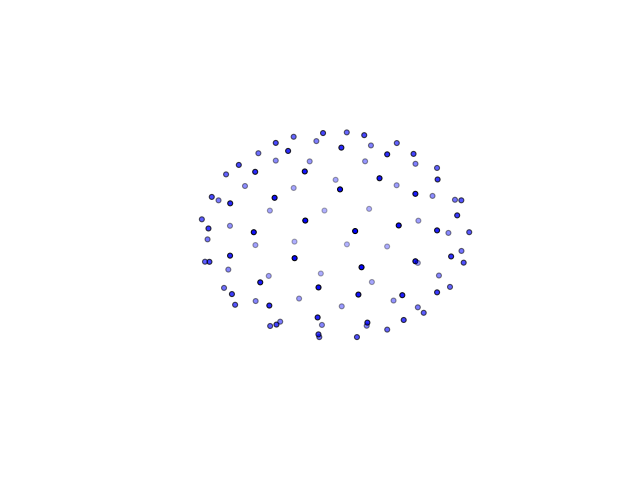

In [11]:
from mpl_toolkits.mplot3d import Axes3D
x, y, z = np.genfromtxt('confout.pqr', unpack=True, usecols=(5,6,7), invalid_raise=False, skip_footer=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axis('off')
ax.scatter(x,y,z)